<a href="https://colab.research.google.com/github/RAAKASH/Blog-gocode/blob/master/MNIST_Digit_recognition_99__accurate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
# Importing helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.15.0-rc3


In [0]:
CIFAR_10 = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = CIFAR_10.load_data()
train_images = train_images;

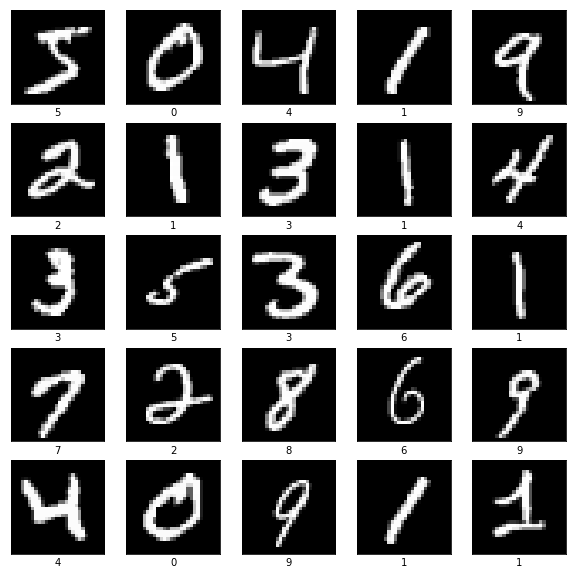

In [0]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]+127,cmap='gray')
    plt.xlabel(class_names[int(train_labels[i])])

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=(28,28,1),filters=32, kernel_size=(3,3),padding='valid', strides=(2, 2),activation='relu'),# size = 13x13
    keras.layers.MaxPool2D(pool_size=(2,2),strides=1),#
    keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2, 2), padding='valid',activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax),
     
 ])
print(model.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 5, 5, 64)          18496     
_________________________________________________________________
flatten_21 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               160100    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 179,926
Trainable params: 179,926
Non-trainable params: 0
_______________________________________________

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.0005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(train_images.reshape(60000,28,28,1), train_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 23s 388us/sample - loss: 0.2992 - acc: 0.9369
Epoch 2/3
60000/60000 [==============================] - 24s 394us/sample - loss: 0.0671 - acc: 0.9802
Epoch 3/3
60000/60000 [==============================] - 23s 388us/sample - loss: 0.0484 - acc: 0.9858


7

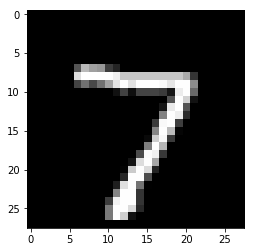

In [0]:
import cv2
plt.imshow(test_images[0],'gray')
np.argmax(model.predict(test_images[0].reshape(1,28,28,1)))
#print (test_images[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


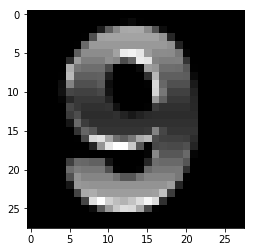

In [0]:
img = cv2.imread('0037-500x500.png', 0);
img = cv2.imread('724426a.numbers-tile-3.png', 0);
img = cv2.imread('download.jpg', 0);
#img = cv2.imread('/content/gold-number-9-MNKWd2F-600.jpg',0);
img = (255-img);
#ret,img = cv2.threshold(img,55,256,cv2.THRESH_BINARY)
resized = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
plt.imshow(resized,'gray')
print(img)

In [0]:
resized = resized.reshape(1,28,28,1);
print(np.argmax(model.predict(resized)))
model.predict(resized)

9


array([[5.2535590e-03, 2.1136355e-05, 1.9820319e-02, 6.3472271e-02,
        4.4070985e-02, 1.3114172e-01, 2.8289480e-03, 1.6358803e-03,
        1.5744155e-02, 7.1601093e-01]], dtype=float32)